<a href="https://colab.research.google.com/github/nopalwaee/Naufal/blob/main/decisiontree_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Dataset Awal ===
    Outlook Temperature Humidity  Windy Play
0     Sunny         Hot     High  False   No
1     Sunny         Hot     High   True   No
2  Overcast         Hot     High  False  Yes
3      Rain        Mild     High  False  Yes
4      Rain        Cool   Normal  False  Yes 

=== Evaluasi Model ===
Confusion Matrix:
 [[1 1]
 [1 2]]

Classification Report:
               precision    recall  f1-score   support

          No       0.50      0.50      0.50         2
         Yes       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

Akurasi: 0.6


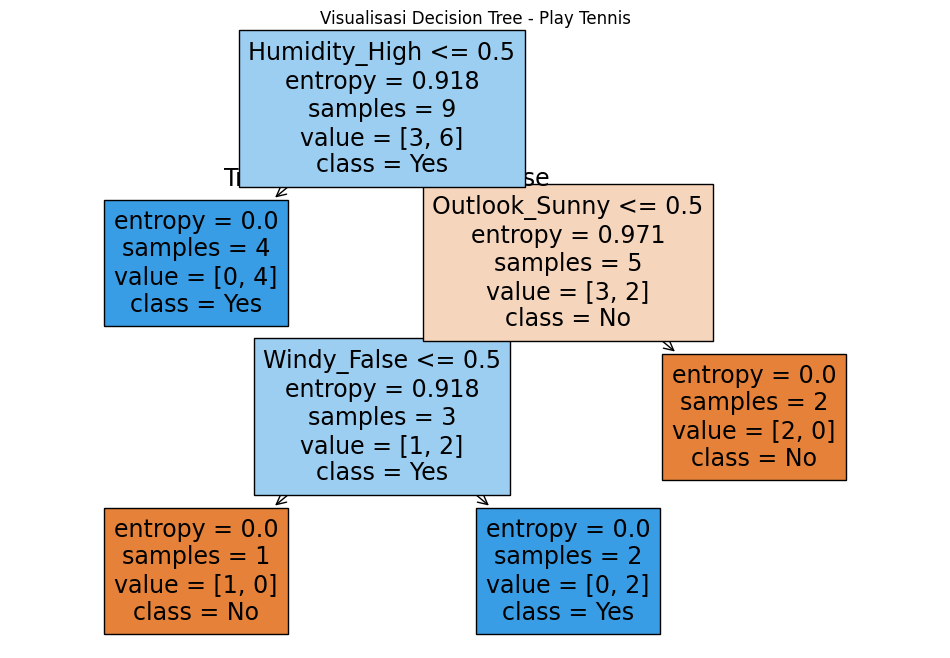

In [1]:
# =========================================================
# Program: Decision Tree Classifier (Play Tennis Dataset)
# Mata Kuliah: Data Mining
# Author: nopalwaee
# =========================================================

# 1️ Import Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 2️ Membuat Dataset (bisa dimodifikasi sesuai kebutuhan)
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast',
                'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                    'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
                 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True,
              False, False, False, True, True, False, True],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
             'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
print("=== Dataset Awal ===")
print(df.head(), "\n")

# 3️ Preprocessing - Encode data kategorikal ke numerik
df_encoded = pd.get_dummies(df, columns=['Outlook', 'Temperature', 'Humidity', 'Windy'])
X = df_encoded.drop('Play', axis=1)
y = df['Play']

# 4️ Split dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5️ Membangun model Decision Tree (menggunakan Entropy)
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
model.fit(X_train, y_train)

# 6️ Prediksi data uji
y_pred = model.predict(X_test)

# 7️ Evaluasi hasil prediksi
print("=== Evaluasi Model ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Akurasi:", accuracy_score(y_test, y_pred))

# 8️ Visualisasi Pohon Keputusan
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Visualisasi Decision Tree - Play Tennis")
plt.show()
